In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as plticker
from matplotlib.gridspec import GridSpec


In [ ]:
data_dir = ""
save_dir = ""
filenames = [ "holograms_flight_006_00085212.pkl", "holograms_flight_006_00085217.pkl", "holograms_flight_006_00085232.pkl",]

d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]
center_points_for_d_bins = [int((d_bins[i]+d_bins[i+1])/2) for i in range(len(d_bins)-1)]

In [43]:
data = np.load(data_dir+filenames[0], allow_pickle=True)

In [44]:
dx = 3e-6
dy = 3e-6
dz = 1e-3
visual_half_range = 1024
zmin = 20
zmax = 180
d_bins = [5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 13.5, 16.5, 23.5, 56.5, 83.5]

color_fc = "#1E88E5"
color_std = "#D81B60"


In [48]:
def set_size(width = 'neurips', fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'neurips':
        width_pt = 397.48499
    elif width == 'icml':
        width_pt = 234.8775
    elif width == 'cvpr':
        width_pt = 233.8583
    elif width == 'iccv':
        width_pt = 496.063
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2
    # golden_ratio = 0.8

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)


# Using seaborn's style
width = 'iccv'


# Set the style to match scientific plotting conventions
plt.style.use('seaborn-v0_8-whitegrid')

# Configure global plot settings
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.linewidth': 1,
    'axes.labelsize': 12,
    'lines.linewidth': 1,
    'grid.linewidth': 0.5,
    'grid.alpha': 0.3,
    'xtick.major.width': 1,
    'ytick.major.width': 1,
    'xtick.direction': 'in',
    'ytick.direction': 'in'
})

markersize = 8
width_pt = 233.8583*3


0.8568305969238281 0.8970251679420471
0.8399999737739563 0.7559999823570251
0.40150412917137146 0.630476176738739


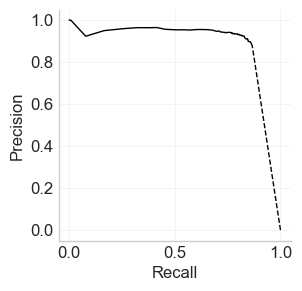

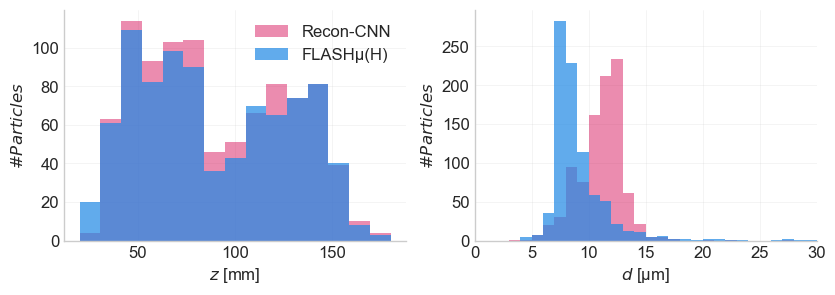

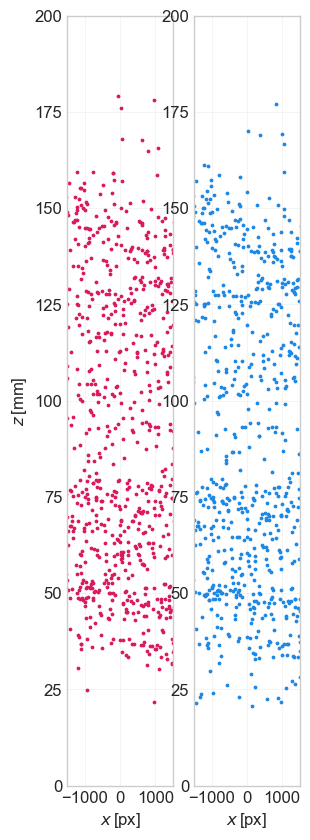

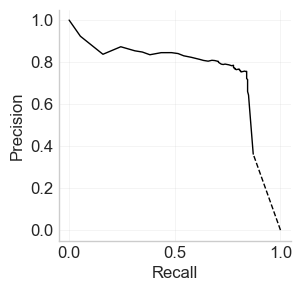

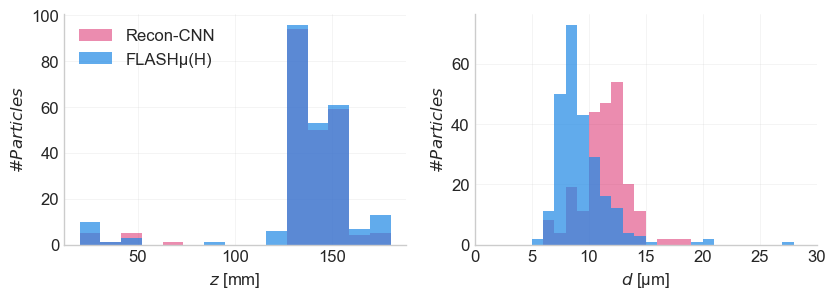

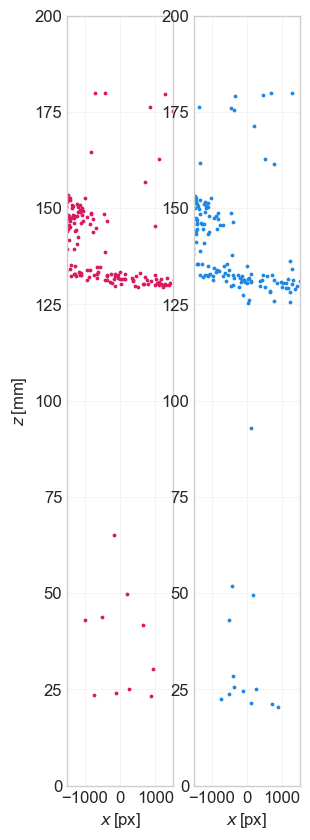

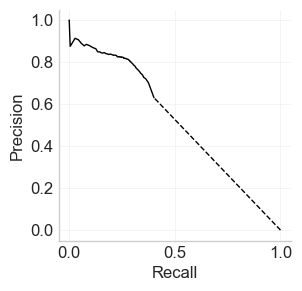

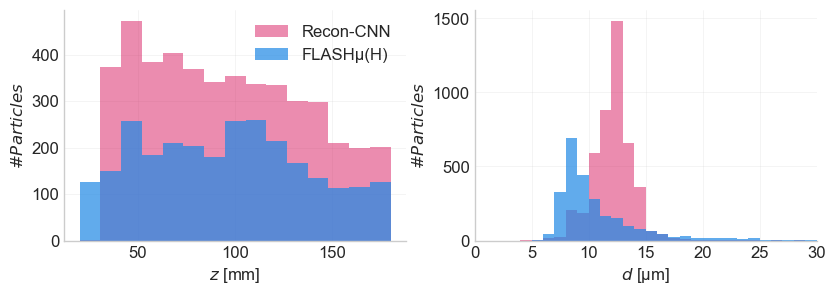

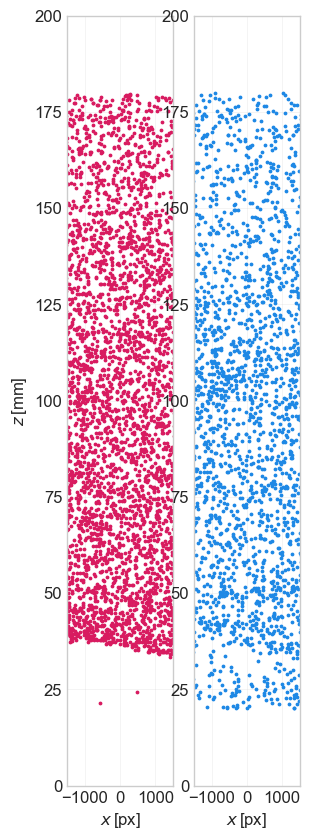

In [67]:
for file in filenames:
    particle_data = np.load(data_dir+file, allow_pickle=True)
    s_cnn_preds = particle_data["d_detected"]
    z_cnn_preds = particle_data["z_detected"]

    s_preds = particle_data["d_predicted"]
    z_preds = particle_data["z_predicted"]

    s_deviation = np.abs(particle_data["d_detected"] - particle_data['d_predicted'])
    z_deviation = np.abs(particle_data["z_detected"] - particle_data['z_predicted'])

    cnn_particle_data = particle_data["cnn_predictions"]

    rec = particle_data['recall']
    prec = particle_data['precision']
    f1sc = particle_data['f1_score']
    idx = np.argmax(f1sc)
    print(rec[idx], prec[idx])

    plt.figure(figsize = (3,3))
    plt.plot(rec, prec, color = 'black')
    plt.plot([1]+[rec[0]], [0]+[prec[0]], color = 'black', ls = '--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')    
    sns.despine()
    plt.savefig(save_dir+file+"prec_rec"+format, bbox_inches = 'tight', format = format[1:])

    fig, (ax1, ax2,) = plt.subplots(1,2, figsize =  set_size(width=width_pt,subplots=(1,2)),)

    b_alpha = 0.5
    a_alpha = 0.7

    z_mask = np.array(((particle_data['z'])<zmax)) * np.array((particle_data['z'])>zmin) 
    z_mask_cnn = np.array(((cnn_particle_data['z'])<zmax)) * np.array((cnn_particle_data['z'])>zmin) 

    z_bins = np.linspace(20, 180, 16)
    ax1.hist(cnn_particle_data['z'][z_mask_cnn], color = color_std, label='Recon-CNN', bins = z_bins, alpha = b_alpha)
    ax1.hist((particle_data['z'])[z_mask], color = color_fc, label='FLASHµ(H)', bins=  z_bins, alpha = a_alpha)
    ax1.legend()
    ax1.set_xlabel(r'$z$ [mm]')
    ax1.set_ylabel(r'$\# Particles$')


    r_bins = np.linspace(3, 70, 68)
    ax2.hist(cnn_particle_data['s'][z_mask_cnn], color = color_std, label='B', bins = r_bins, alpha = b_alpha)
    ax2.hist(particle_data['s'][z_mask], color = color_fc, label='A', alpha = a_alpha, bins = r_bins)
    ax2.set_xlim(0,30)
    sns.despine(fig)
    ax2.set_xlabel(r'$d$ [µm]')
    ax2.set_ylabel(r'$\# Particles$')
    plt.savefig(save_dir+file+"unmatched1"+format, bbox_inches = 'tight', format = format[1:])

    fig, (ax3, ax4) = plt.subplots(1,2, figsize = (3,10) )

    ax3.scatter((cnn_particle_data['x']/dx)[z_mask_cnn], cnn_particle_data['z'][z_mask_cnn], marker = 'o' ,s = 3, color = color_std,)
    ax4.scatter((particle_data['x']/dx)[z_mask], (particle_data['z'])[z_mask], marker = 'o', s = 3, color = color_fc,)
    ax3.set_ylim(0,200)
    ax4.set_ylim(0,200)
    ax3.set_xlim(-1500,1500)
    ax4.set_xlim(-1500,1500)
    ax3.set_ylabel(r'$z\,$[mm]')
    # ax4.set_ylabel(r'$z\,$[mm]')
    ax3.set_xlabel(r'$x\,$[px]')
    ax4.set_xlabel(r'$x\,$[px]')
    plt.savefig(save_dir+file+"unmatched2"+'.pdf', bbox_inches = 'tight', format = 'pdf')
